In [1]:
using Revise
using Pkg
Pkg.activate("/Users/jlazar/research/TAMBO-MC/tambo/")
push!(LOAD_PATH, "/Users/jlazar/research/TAMBO-MC/tambo/src/")
using Tambo
using Geometries
using Units
using Plots
using Tracks

  Activating project at `~/research/TAMBO-MC/tambo`
┌ Info: Precompiling Tambo [top-level]
└ @ Base loading.jl:1423


In [2]:
g = Geometry("/Users/jlazar/research/TAMBO-MC/resources/tambo_spline.npy")

Geometry(Geometries.var"#valley#8"{PyCall.PyObject, TPoint}(PyObject <scipy.interpolate.fitpack2.SmoothBivariateSpline object at 0x7f89611cd7f0>, TPoint(1.0861128281947554e11, 9.255962119588487e10, 1.3591005374020985e10)), Box([-1.0861128281947554e11, -9.255962119588487e10, -1.520319281223e11], [1.0861128281947554e11, 9.255962119588487e10, 2.533865468705e10]), TPoint(1.0861128281947554e11, 9.255962119588487e10, 1.3591005374020985e10))

In [3]:
g.tambo_center/m

TPoint(21431.935546875, 18264.509765625, 2681.871934773047)

In [4]:
g.valley(21431.935546875*m, 18264.509765625*m)/m

2342.249886180413

In [5]:
# plotlyjs()

res         = 50
gifify      = false
show_track  = true
spatial_res = 200m # meter

xx = LinRange(g.box.c1[1], g.box.c2[1], res)./m .+ 21431.935546875
yy = LinRange(g.box.c1[2], g.box.c2[2], res)./m .+ 18264.509765625
println(xx)
println(yy)


kwargs = Dict(
    :xlim=>(minimum((g.box.c1[1], g.box.c2[1])), maximum((g.box.c1[1], g.box.c2[1]))),
    :ylim=>(minimum((g.box.c1[2], g.box.c2[2])), maximum((g.box.c1[2], g.box.c2[2]))),
    :zlim=>(minimum((g.box.c1[2], g.box.c2[3])), maximum((g.box.c1[3], g.box.c2[3]))),
    :st=>:surface,
    :alpha=>0.9,
    :c=>cgrad(palette([:skyblue3, :skyblue2, :navajowhite3, :navajowhite3, :goldenrod4, :goldenrod4, :olivedrab, :olivedrab, :green, :green, :green, :green])),
    :colorbar=>false,
    :legend=>false,
)

l   = @layout [a{0.7h} ; c{0.5w} d]
f(x, y) = spl(x,y)[1]
# plt = surface(xx./m, yy./m, f)
l   = @layout [a{0.7h} ; c{0.5w} d]
plt = surface(xx./m, yy./m, f, axis=([], false), layout=l; kwargs...)
# This should be done with an imshow-like thing.... I think
surface!(plt[2], xx, yy, f; camera=(0,90), kwargs...)
surface!(plt[3], xx, yy, f; camera=(0,0), kwargs...)
display(plt)

range(0.0, stop=42863.87109375, length=50)
range(0.0, stop=36529.01953125, length=50)


LoadError: UndefVarError: spl not defined

In [6]:
x = np.load("../resources/tambo_spline.npy", allow_pickle=true)
spl = x[1]

LoadError: UndefVarError: np not defined

In [7]:
a = []
for x in xx
    push!(a, [g.valley(x,y)/m for y in yy])
#     println()
end

In [8]:
yy = LinRange(g.box.c1[2], g.box.c2[2], res)./m .+ 18264.509765625

50-element LinRange{Float64, Int64}:
 0.0,745.49,1490.98,2236.47,2981.96,3727.45,…,34292.5,35038.0,35783.5,36529.0

In [9]:
b = []
for x in xx./m .+ 21431.935546875
    push!(b, [g.spl(x,y)[1] for y in yy./m .+ 18264.509765625])
#     println()
end



LoadError: type Geometry has no field spl

In [10]:
c = []
for x in xx./m .+ 21431.935546875
    push!(c, [spl(x,y)[1] for y in yy./m .+ 18264.509765625])
#     println()
end



LoadError: UndefVarError: spl not defined

In [11]:
ts = Tambo.TAMBOSim()
ts.n = 100000
# ts.ϕmin = π/2
# ts.ϕmax = π/2
# ts.θmin = 0
# ts.θmax = 0
# ts.r_injection = 0
ts.l_endcap = 10km
Tambo.verify_ts!(ts)

In [12]:
e = rand(ts.n, ts.pl)

100000-element Vector{Float64}:
 1.0840015396418588e15
 1.2057685223570862e15
 1.8763168969204748e16
 2.285231684655586e15
 1.8888255207581502e15
 1.3655413992835872e15
 1.0168423609662916e15
 6.8339778064482e15
 3.060163076245953e15
 1.0041153706628584e15
 1.7282738533332235e15
 1.5376562015252658e15
 1.4658811902971958e15
 ⋮
 2.3455616840895715e15
 1.3102884910956354e16
 2.2032000806704032e15
 1.0315737243498125e15
 1.017834449036076e15
 1.1444873740155358e15
 5.717095803099889e15
 4.165481046605699e15
 1.1036098478190358e16
 5.173028595041268e15
 2.55570819431167e15
 1.6375169133064598e15

In [13]:
range = Tambo.lepton_range.(e, Ref(ts.ν_pdg))
println("The range in mwe is")
println(range[1]/(100Units.gr/Units.cm^2))

The range in mwe is
99493.5859103519


In [14]:
θ = acos.(rand(ts.n) .* (cos(ts.θmin)-cos(ts.θmax)) .+ cos(ts.θmax))
# println("θ is:")
# println(θ[1])
# println()
# Randomly sample azimuth
ϕ = rand(ts.n) .* (ts.ϕmax-ts.ϕmin) .+ ts.ϕmin
# println("ϕ is:")
# println(ϕ[1])
# println()
b = ts.r_injection .* sqrt.(rand(ts.n))
# println("The impact parameter in meters is:")
# println(b[1] / m)
# println()
ψ = rand(ts.n) .* 2π
p_near = TPoint.(Tambo.perpendicular_plane.(θ, ϕ, b, ψ))
# println("The point of closest approach in meters is:")
# println(p_near[1]/m)
# println()
# println("The impact parameter after rotation in meters is:")
# println(sqrt(sum(p_near[1].x^2+p_near[1].z^2+p_near[1].y^2))/m)
# println()
ti = Track.(p_near, Tracks.Direction.(θ, ϕ), Ref(ts.geo.box))
# println("The incoming track is:")
# println(ti[1])
# println()
# println("And it intersects the box at")
# println(ti[1].fpoint/m)
# println()
# println("Its total column depth in mwe is")
# println(total_column_depth(ti[1], ts.geo.valley) ./ (100Units.gr/Units.cm^2))
# println()
# Make track from point of closest approach to point of exit
to = Track.(p_near, Tracks.Direction.(π.-θ, mod.(ϕ.+π, 2π)), Ref(ts.geo.box))
# println("The outgoing track is:")
# println(to[1])
# println()
# println("And it intersects the box at")
# println(to[1].fpoint/m)
# println()
# println("Its total column depth in mwe is")
# println(total_column_depth(to[1], ts.geo.valley)/mwe)
# println()
x = Tambo.sample_column_depth.(ti, to, Ref(ts), range)
cd = [v[1] for v in x]
tr = [v[2] for v in x]
# println(tr.fpoint/m)
λ_int = Tracks.inverse_column_depth.(tr, cd, Ref(ts.geo.valley))
p_int = [tr[i](λ_int[i]) for i in eachindex(tr)]


LoadError: MethodError: no method matching -(::Vector{Float64}, ::Float64)
For element-wise subtraction, use broadcasting with dot syntax: array .- scalar
[0mClosest candidates are:
[0m  -([91m::ChainRulesCore.AbstractThunk[39m, ::Any) at ~/.julia/packages/ChainRulesCore/oBjCg/src/tangent_types/thunks.jl:32
[0m  -([91m::DualNumbers.Dual[39m, ::Number) at ~/.julia/packages/DualNumbers/Le5bO/src/dual.jl:233
[0m  -([91m::LinearAlgebra.UniformScaling[39m, ::Number) at /Applications/Julia-1.7.app/Contents/Resources/julia/share/julia/stdlib/v1.7/LinearAlgebra/src/uniformscaling.jl:147
[0m  ...

In [15]:
p_near_m = p_near./m
scatter(getfield.(p_near_m, :x), getfield.(p_near_m, :y), getfield.(p_near_m, :z), alpha=0.1)

InterruptException: InterruptException:

In [16]:
p_int_m = p_int./m
sct = scatter3d(getfield.(p_int_m, :x), getfield.(p_int_m, :y), getfield.(p_int_m, :z), alpha=0.1)
scatter!(sct, [0], [0], [0])
plot!(ylim=(-1000, 1000), zlim=(-3e3, 5e3))
scatter!(sct, camera=(90,0))

LoadError: UndefVarError: p_int not defined

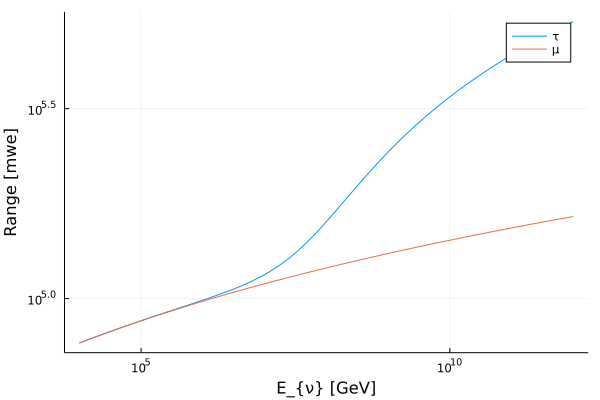

In [16]:
function muon_range(emu)
    emu_gev = emu / GeV
    da = 0.212/1.2
    db = 0.251e-3/1.2
    1 / db * log(1 + emu_gev*da/db)
end

ee = 10 .^ LinRange(4, 12, 200) .* GeV
plt = plot(ee./GeV, Tambo.lepton_range.(ee, Ref(16))./mwe, label="τ")
plot!(ee./GeV, Tambo.lepton_range.(ee, Ref(14))./mwe, label="μ")
plot(plt, xaxis=:log, yaxis=:log, xlabel="E_{ν} [GeV]", ylabel="Range [mwe]")


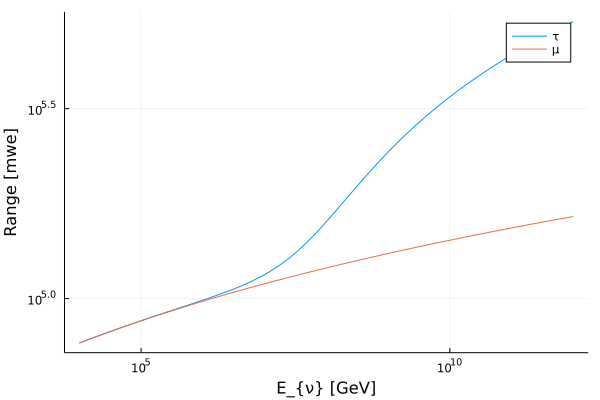

In [17]:
function muon_range(emu)
    emu_gev = emu / GeV
    da = 0.212/1.2
    db = 0.251e-3/1.2
    1 / db * log(1 + emu_gev*da/db)
end

ee = 10 .^ LinRange(4, 12, 200) .* GeV
plt = plot(ee./GeV, Tambo.lepton_range.(ee, Ref(16))./mwe, label="τ")
plot!(ee./GeV, Tambo.lepton_range.(ee, Ref(14))./mwe, label="μ")
plot(plt, xaxis=:log, yaxis=:log, xlabel="E_{ν} [GeV]", ylabel="Range [mwe]")
